In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords','wordnet'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [4]:
dftr = pd.read_csv('train.txt', delimiter=';', names=['text','sentiment'])
dfval = pd.read_csv('val.txt', delimiter=';', names=['text','sentiment'])
df = pd.concat([dftr,dfval])
df.reset_index(inplace=True, drop=True)
df.head(10)

,text,sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,joy
9,i feel romantic too,love


In [5]:
mapping = {'love':1,'surprise':1,'joy':1,'sadness':0,'anger':0,'fear':0}
df.sentiment = [mapping[item] for item in df.sentiment]

In [6]:
lm = WordNetLemmatizer()
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus
corpus = text_transformation(df['text'])
print(corpus)

['didnt feel humiliated', 'go feeling hopeless damned hopeful around someone care awake', 'im grabbing minute post feel greedy wrong', 'ever feeling nostalgic fireplace know still property', 'feeling grouchy', 'ive feeling little burdened lately wasnt sure', 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny', 'feel confused life teenager jaded year old man', 'petronas year feel petronas performed well made huge profit', 'feel romantic', 'feel like make suffering seeing mean something', 'feel running divine experience expect type spiritual encounter', 'think easiest time year feel dissatisfied', 'feel low energy thirsty', 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious', 'feel reassured anxiety side', 'didnt really feel embarrassed', 'feel pretty pathetic time', 'started feeling sentimental doll child began collection vintage barbie doll si

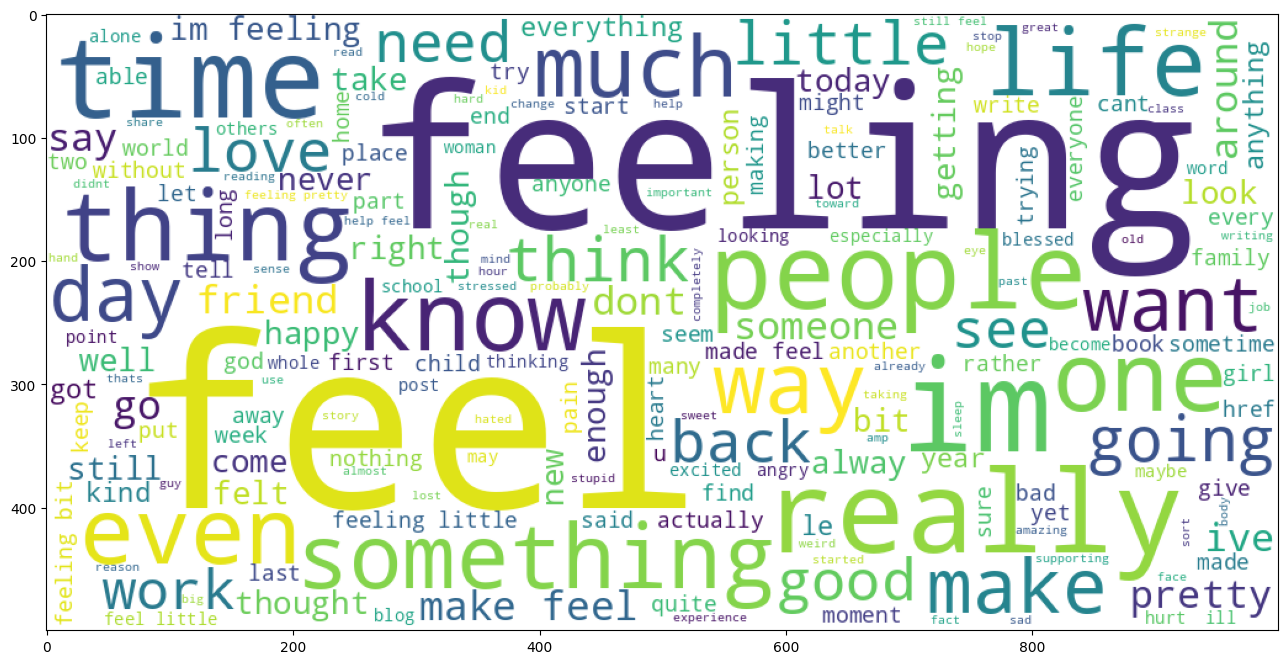

In [7]:
plt.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [8]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df.sentiment

In [9]:
#parameters = {'max_features': ('auto','sqrt'),'n_estimators': [500, 1000, 1500],'max_depth': [5, 10, None],'min_samples_split': [5, 10, 15],'min_samples_leaf': [1, 2, 5, 10],'bootstrap': [True, False]}

#grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)
#grid_search.fit(X,y)
#grid_search.best_params_

In [10]:
rfc = RandomForestClassifier()
rfc.fit(X,y)

RandomForestClassifier()

In [11]:
test_df = pd.read_csv('test.txt',delimiter=';',names=['text','sentiment'])
X_test,y_test = test_df.text,test_df.sentiment

mapping = {'love':1,'surprise':1,'joy':1,'sadness':0,'anger':0,'fear':0}
test_df = [mapping[item] for item in y_test]

test_corpus = text_transformation(X_test)

testdata = cv.transform(test_corpus)

predictions = rfc.predict(testdata)

In [12]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Negative Sentiment.")
    elif prediction_input == 1:
        print("Positive Sentiment.")
    else:
        print("Invalid Statement.")
        
def sentiment_predictor(input):
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = rfc.predict(transformed_input)
    expression_check(prediction)
input1 = ["Sometimes I just want to punch someone in the face."]
input2 = ["I have a very cool thing to show you."]
sentiment_predictor(input1)
sentiment_predictor(input2)

Input statement has Negative Sentiment.
Input statement has Positive Sentiment.
